# Multinomial Logistic Regression (Softmax Regression)

In [8]:
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

## Load dataset (iris)
- X
    - sepal length (cm)
    - sepal width (cm)
    - petal length (cm)
    - petal width (cm)
- y
    - Iris-Setosa (0), Iris-Versicolour(1), Iris-Virginica (2)

In [9]:
x, y = load_iris(return_X_y=True)

In [10]:
# check y value
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Split Dataset (using OneHot Encoding)

In [19]:
y_ohe = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y_ohe)
x_train.shape, y_train.shape

((112, 4), (112, 3))

In [40]:
x1_train = np.hstack([np.ones([x_train.shape[0], 1]), x_train])
x1_test = np.hstack([np.ones([x_test.shape[0], 1]), x_test])

In [41]:
x1_train.shape, x1_test.shape

((112, 5), (38, 5))

## Learning
- loss function
$$
\min _{w, b} \sum_{i=0}^{N-1} \sum_{k=0}^{C-1}\left[-y_k \cdot \log \left(\hat{y}_{i, k}\right)\right]
$$

In [42]:
# loss function
n_feature = x_train.shape[1]
n_class = y_train.shape[1]
REG_CONST = 0.01

def softmax(z):
    ## IMPLEMENT HERE
    s = np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1, 1)
    return s

def ce_loss(W, args):
  train_x, train_y = args
  W = W.reshape((n_class, n_feature+1))

  z = (W @ train_x.T).T
  y_hat = softmax(z)
  train_ce = np.sum(-train_y * np.log(y_hat + 1e-10), axis=1)
  train_loss = train_ce.mean() + REG_CONST * np.mean(np.square(W))

  return train_loss


In [35]:
# optimization
init_w = np.ones( n_class * (n_feature + 1)) * 0.1
result = optimize.minimize(ce_loss, init_w, args=[x1_train, y_train])

## Evaluation

In [45]:
# Accuracy
W = result.x.reshape(n_class, n_feature+1)
z = (W @ x1_test.T).T
y_hat = softmax(z)
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
acc = (y_hat == y_true).mean()
print(f'accuracy: {acc}')

accuracy: 0.9736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


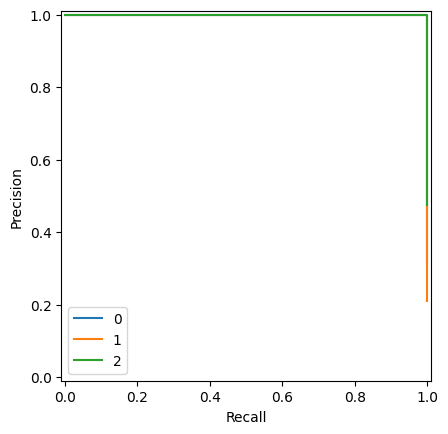

In [47]:
# PR-Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
y_hat_sm = softmax(z)

_, ax = plt.subplots()
for i in range(n_class) :
    pr, rc, _ = precision_recall_curve(y_true=y_test[:, i], probas_pred=y_hat_sm[:,i])
    disp = PrecisionRecallDisplay(precision=pr, recall=rc)
    disp.plot(ax=ax, label=f'{i}')
plt.show()